In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [130]:
#lambda : trialname
trial_names = {
    1000: "2020_03_15--16_20_09_add_mean_features_freeze_l2_lambda1000_TRAIN",
    100: "2020_03_15--16_20_19_add_mean_features_freeze_l2_lambda100_TRAIN",
    10: "2020_03_15--16_20_28_add_mean_features_freeze_l2_lambda10_TRAIN",
    1: "2020_03_15--16_20_45_add_mean_features_freeze_l2_lambda1_TRAIN",
    0.1: "2020_03_15--16_38_59_add_mean_features_freeze_l2_lambdap1_TRAIN",
    0.01: "2020_03_15--16_21_01_add_mean_features_freeze_l2_lambdapp1_TRAIN",
    0.001: "2020_03_15--22_51_11_add_mean_features_freeze_l2_lambdappp1_TRAIN",
    0.0001: "2020_03_15--22_52_16_add_mean_features_freeze_l2_lambdappp1_TRAIN"
}

/data7/drone_machinelearning/anaconda3/envs/standard/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/data7/drone_machinelearning/anaconda3/envs/standard/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/data7/drone_machinelearning/anaconda3/envs/standard/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

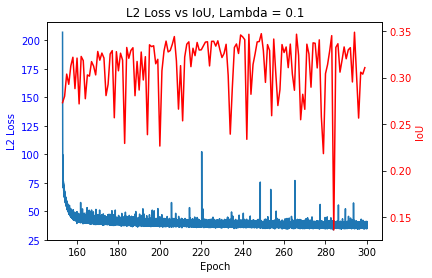

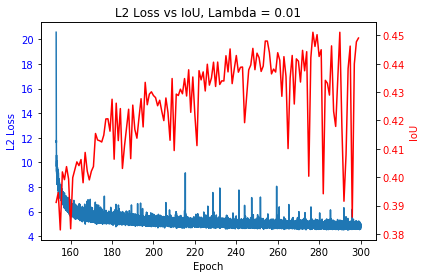

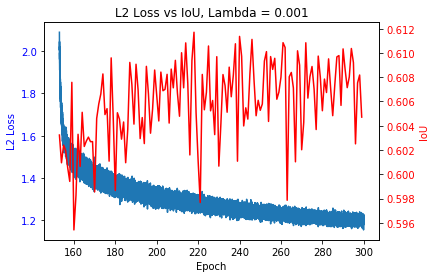

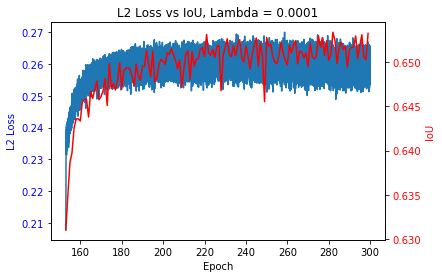

In [131]:

for lam in [0.1,0.01, 0.001, 0.0001]:
    trial_name = trial_names[lam]
    tr = pd.read_pickle("./output/{}/training_record.pkl".format(trial_name))
    num_minibatch = tr["Minibatch"].max()
    minibatch_df = (tr[tr["Minibatch"]!=-1])
    minibatch_df["Epoch"] = minibatch_df["Epoch"] + minibatch_df["Minibatch"]*(1/num_minibatch)
    minibatch_df = minibatch_df[["Epoch", "L2_Loss"]]

    epoch_df = (tr[tr["Minibatch"]==-1])
    epoch_df = epoch_df[["Epoch", "IoU"]]

    # plots
    x1 = minibatch_df["Epoch"]
    y1 = minibatch_df["L2_Loss"]
    x2 = epoch_df["Epoch"]
    y2 = epoch_df["IoU"]

    #x = np.linspace(0, 2*np.pi)
    #y1 = np.sin(x);
    #y2 = 0.01 * np.cos(x);

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(x1, y1)
    ax1.set_ylabel('L2 Loss', color='b')
    ax1.set_xlabel("Epoch")
    ax1.set_title("L2 Loss vs IoU, Lambda = {}".format(lam))
    for tl in ax1.get_yticklabels():
        tl.set_color('b')


    ax2 = ax1.twinx()
    ax2.plot(x2, y2, 'r-')
    ax2.set_ylabel('IoU', color='r')
    for tl in ax2.get_yticklabels():
        tl.set_color('r')

In [132]:
for lam in [0.1,0.01, 0.001, 0.0001]:
    trial_name= trial_names[lam]
    weights_path = "./output/{}/checkpoints/ckpt-epoch-0300.pth".format(trial_name)
    print(weights_path)
    #weights_path = "./saved_params/Pix2Vox-A-ShapeNet.pth"
    cmd = ('python runner.py --gpu 1 --weights {} '
           '--trial_comment add_mean_features_freeze_l2_lambda_{}e300 '
           '--test --test_dataset OWILD --save_num -1 '
           '--classes Airplane_model Car_Model Monitor Lamp Telephone Boat_Model '
           '--num_views 1 --add_mean_features ')

    cmd = cmd.format(weights_path, lam)
    print(cmd)
    !{cmd}

./output/2020_03_15--16_38_59_add_mean_features_freeze_l2_lambdap1_TRAIN/checkpoints/ckpt-epoch-0300.pth
python runner.py --gpu 1 --weights ./output/2020_03_15--16_38_59_add_mean_features_freeze_l2_lambdap1_TRAIN/checkpoints/ckpt-epoch-0300.pth --trial_comment add_mean_features_freeze_l2_lambda_0.1e300 --test --test_dataset OWILD --save_num -1 --classes Airplane_model Car_Model Monitor Lamp Telephone Boat_Model --num_views 1 --add_mean_features 
[INFO] 2020-03-17 21:47:01.452384 Collecting files of Taxonomy[ID=Boat_Model, Name=Boat_Model]
[INFO] 2020-03-17 21:47:01.517906 Collecting files of Taxonomy[ID=Car_Model, Name=Car_Model]
[INFO] 2020-03-17 21:47:01.530925 Collecting files of Taxonomy[ID=Lamp, Name=Lamp]
[INFO] 2020-03-17 21:47:01.566554 Collecting files of Taxonomy[ID=Monitor, Name=Monitor]
[INFO] 2020-03-17 21:47:01.582460 Collecting files of Taxonomy[ID=Telephone, Name=Telephone]
[INFO] 2020-03-17 21:47:01.596085 Complete collecting files of the dataset. Total files: 15.
[INF